<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Introduction </h1>

[Github link to project](https://github.com/PhamAnhTuan084/DATH_P4DS)

Student in this final project:

- 19127084 - Phạm Anh Tuấn

Being inspired by the teacher's sharing on the last day of the lecture `Programming for Data Science` about **health**, I decided to look for a related topic. Moreover, I am expecting to see a positive vibe in tech industry around the world about mental health problems.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Library </h1> 

Import neccessary library for this file.

In [1]:
import sys
sys.executable

'/home/tuan/miniconda3/bin/python'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2">  Data Collection </h1> 
    
## Objectives and Ideas
As sharing before, I decided to find the dataset about the mental health problems, especially in technology field. I found this whilst going on [Kaggle.com](https://www.kaggle.com/) which is a popular website with lots of useful dataset to start working.

## Sources
The title: *[Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?datasetId=311)* \
**Survey on Mental Health in the Tech Workplace in 2014**

## About Dataset
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## The author
The survey comes from **OSMI**.\
*OSMI is a non-profit 501c3 corporation dedicated to "raising awareness, educating, and providing resources to support mental wellness in the tech and **open source** communities." What they do in support of this goal includes providing e-books on mental wellness in the workplace, hosting a forum on conversations on mental health, and holding talks at developer conferences about mental health in the community.* \
Details can be found at: *[About OSMI](https://osmihelp.org/index.html)* 

## License
The dataset gets the License CC BY-SA 4.0 for:
- Share — copy and redistribute the material in any medium or format.
- Adapt — remix, transform, and build upon the material for any purpose, even commercially.

## Is it a sample, and was it properly sampled?
Yes, it is a sample. I can't find official information about the data collection method, but it appears *not* to be a random sample (the survey link is available on their website), so I can assume that it is not representative.

## How did authors collect data?
OSMI provides a survey on mental health in tech industry. This survey contains a variety of questions pertaining to the mental health of the respondents, the demographics of the respondents, and how employer views on mental health in the workplace. This survey was conducted in 2014.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2	">   Exploring data </h1> 

I will need to check briefly what is in the dataset.

In [3]:
df = pd.read_csv('survey.csv')
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## How many rows and columns in the dataset?

In [4]:
print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
print(df.shape)

Shape of the data (rows, columns):
(1259, 27)


We can see that there are 1259 rows with 27 columns.

## What is the meaning of each column?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

There are **27** columns in the datset.
The survey covers information mainly in 5 aspects: 
1. **Geographic** and **Demographic** information of responders: e.g. **Age**, **Gender**, **Country**, **state**, **family history** of mental illness.
2.  Basic information about **workspace**: e.g. **self-employed** or not, **number of employees**, **remote work** or not, **tech company** or not, **work interfere** when have mental health condition.
3.  **Supporting** for mental health from Workspaces: 
* **benefits**: Does your employer provide mental health benefits?
* **care_options**: Do you know the options for mental health care your employer provides?
* **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave**: How easy is it for you to take medical leave for a mental health condition?
4. **Possible negative consequence**:
* **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
* **phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
* **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* **mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?
* **phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?
* **mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
5. Whether or not seek mental disorder treatment: **treatment**.

## What is the meaning of each row?

In [6]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
204,2014-08-27 13:00:38,34,male,Austria,NaN,No,Yes,No,NaN,100-500,...,Very easy,No,No,Yes,Yes,No,No,Yes,No,NaN


Each row presents for each respondents about their opinion with mental health problems.

## Are there duplicated rows?

In [7]:
dups_count = df.duplicated(keep='first').sum()
dups_count != 0

False

Fortunately, there is NO duplicated rows in the dataset.

## What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
col_dtypes = pd.Series(df.dtypes)
col_dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

**Summaries:**

- Summary of data types in this dataset:
 - Numeric <strong>Age</strong> (integer)
 - Object: Everything else
- Further observations on this data set:
 - <strong>Timestamp</strong>: convert to datetime

In [9]:
# use pandas to change data type for Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

## Missing values

In [10]:
raw_data = df.copy()

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print("Missing value count and percentage: ")
print(null_summary)

Missing value count and percentage: 
                           Count  Percentage
comments                    1095   86.973789
state                        515   40.905481
work_interfere               264   20.969023
self_employed                 18    1.429706
seek_help                      0    0.000000
obs_consequence                0    0.000000
mental_vs_physical             0    0.000000
phys_health_interview          0    0.000000
mental_health_interview        0    0.000000
supervisor                     0    0.000000
coworkers                      0    0.000000
phys_health_consequence        0    0.000000
mental_health_consequence      0    0.000000
leave                          0    0.000000
anonymity                      0    0.000000
Timestamp                      0    0.000000
wellness_program               0    0.000000
Age                            0    0.000000
benefits                       0    0.000000
tech_company                   0    0.000000
remote_work       

- Since **comments** are usually optional for responders and almost 87% of data were missing, this column is not essential information for analysis. So I drop this column.

In [11]:
# drop comments column
df = df.drop("comments",axis = 1)

- For **state**, **work_interfere** and **self_employed**, I need to consider treating these columns.

In [12]:
# explore Country variable
country_count = df.Country.value_counts()
country_percent = country_count/len(df.index)*100
country_summary = pd.concat([country_count, country_percent], axis = 1, keys = ["Count", "Percentage"])
print("Country value count and percentage: ")
print(country_summary)

# explore state variables
print("\nState: ")
print(df['state'].unique())

Country value count and percentage: 
                        Count  Percentage
United States             751   59.650516
United Kingdom            185   14.694202
Canada                     72    5.718824
Germany                    45    3.574265
Ireland                    27    2.144559
Netherlands                27    2.144559
Australia                  21    1.667990
France                     13    1.032566
India                      10    0.794281
New Zealand                 8    0.635425
Poland                      7    0.555997
Switzerland                 7    0.555997
Sweden                      7    0.555997
Italy                       7    0.555997
South Africa                6    0.476569
Belgium                     6    0.476569
Brazil                      6    0.476569
Israel                      5    0.397141
Singapore                   4    0.317712
Bulgaria                    4    0.317712
Austria                     3    0.238284
Finland                     3    0.2382

**Summaries:**

- Almost 60% of data come from United States, roughly 15% come from United Kindom, data points come from other countries only account for a small portion.
- Form [List of states and territories of the United States](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States), all state information is only valid for data points from United States.

Since a lot of missing values and biased distribution of data points in United States. I will drop them.

In [13]:
# drop Country and state
df.drop(["Country", "state"],axis = 1, inplace = True)

We can easily see that just about 21% of data in **work_interfere** columns is NaN.

- Looking at **work_interfere**'s content:

Frequency:
Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


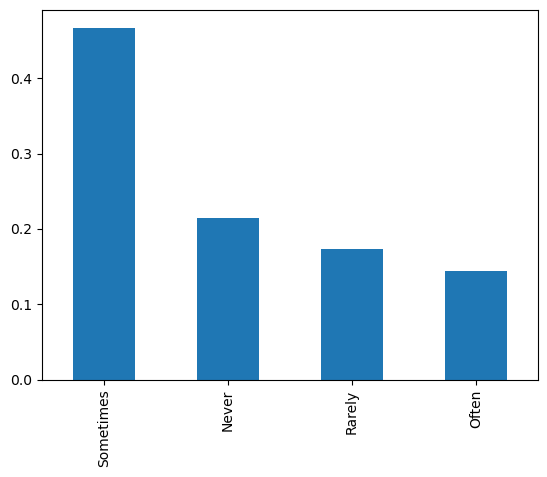

In [14]:
print("Frequency:")
print(df["work_interfere"].value_counts(normalize = True))
print(df["work_interfere"].value_counts(normalize = True).plot(kind='bar'))

- I fill in the missing value as `Don't know`.

In [15]:
df["work_interfere"] = df["work_interfere"].fillna("Don't know")

- The next step is figuring out the frequency of **work_interfere**.

Sometimes     0.369341
Don't know    0.209690
Never         0.169182
Rarely        0.137411
Often         0.114376
Name: work_interfere, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


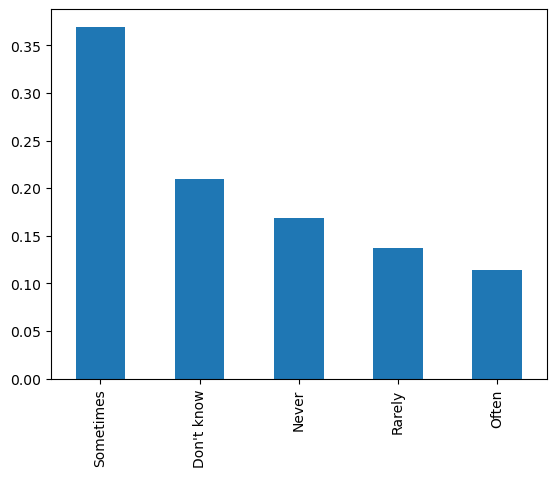

In [16]:
print(df["work_interfere"].value_counts(normalize = True))
print(df["work_interfere"].value_counts(normalize = True).plot(kind='bar'))

- Moving onto **self_employed** column.

No     0.882353
Yes    0.117647
Name: self_employed, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


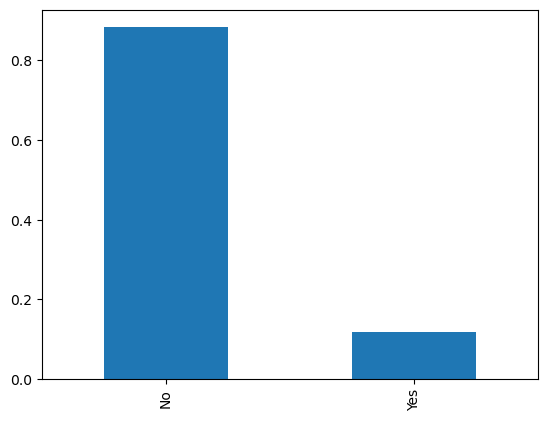

In [17]:
print(df["self_employed"].value_counts(normalize = True))
print(df["self_employed"].value_counts(normalize = True).plot(kind='bar'))

Since only virtually 1.4% of data are missing and `No` constitutes the majority of the answers with essentially 0.9. It may be the default answer for the responders who ignored this question, therefore I will fill in the missing value as `No`.

In [18]:
df["self_employed"] = df["self_employed"].fillna("No")

- Next, review the **self_employed**.

No     0.884035
Yes    0.115965
Name: self_employed, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


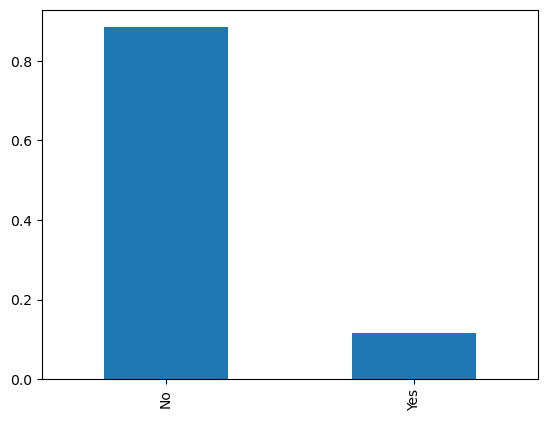

In [19]:
print(df["self_employed"].value_counts(normalize = True))
print(df["self_employed"].value_counts(normalize = True).plot(kind='bar'))

- Is there still any missing?

In [20]:
raw_data = df.copy()

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print("Missing value count and percentage: ")
print(null_summary)

Missing value count and percentage: 
                           Count  Percentage
Timestamp                      0         0.0
Age                            0         0.0
mental_vs_physical             0         0.0
phys_health_interview          0         0.0
mental_health_interview        0         0.0
supervisor                     0         0.0
coworkers                      0         0.0
phys_health_consequence        0         0.0
mental_health_consequence      0         0.0
leave                          0         0.0
anonymity                      0         0.0
seek_help                      0         0.0
wellness_program               0         0.0
care_options                   0         0.0
benefits                       0         0.0
tech_company                   0         0.0
remote_work                    0         0.0
no_employees                   0         0.0
work_interfere                 0         0.0
treatment                      0         0.0
family_history    

Then I check min, max and abnormality with each numerical and categorical column.

## With each numerical and categorical column

- Finding min and max.

In [21]:
round(df.describe(include='all'),2)

,Timestamp,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259,1.259000e+03,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,1246,NaN,49,2,2,2,5,6,2,2,...,3,5,3,3,3,3,3,3,3,2
top,2014-08-27 12:44:51,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,2,NaN,615,1113,767,637,465,290,883,1031,...,819,563,490,925,774,516,1008,557,576,1075
first,2014-08-27 11:29:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-02-01 23:04:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- After that I overview column **Age** and **Gender**.

In [22]:
df["Age"].describe().apply(lambda x: format(x, 'f'))

count           1259.000000
mean        79428148.311358
std       2818299442.981952
min            -1726.000000
25%               27.000000
50%               31.000000
75%               36.000000
max      99999999999.000000
Name: Age, dtype: object

The dataset contains different age groups including:
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


<AxesSubplot:xlabel='Age', ylabel='count'>

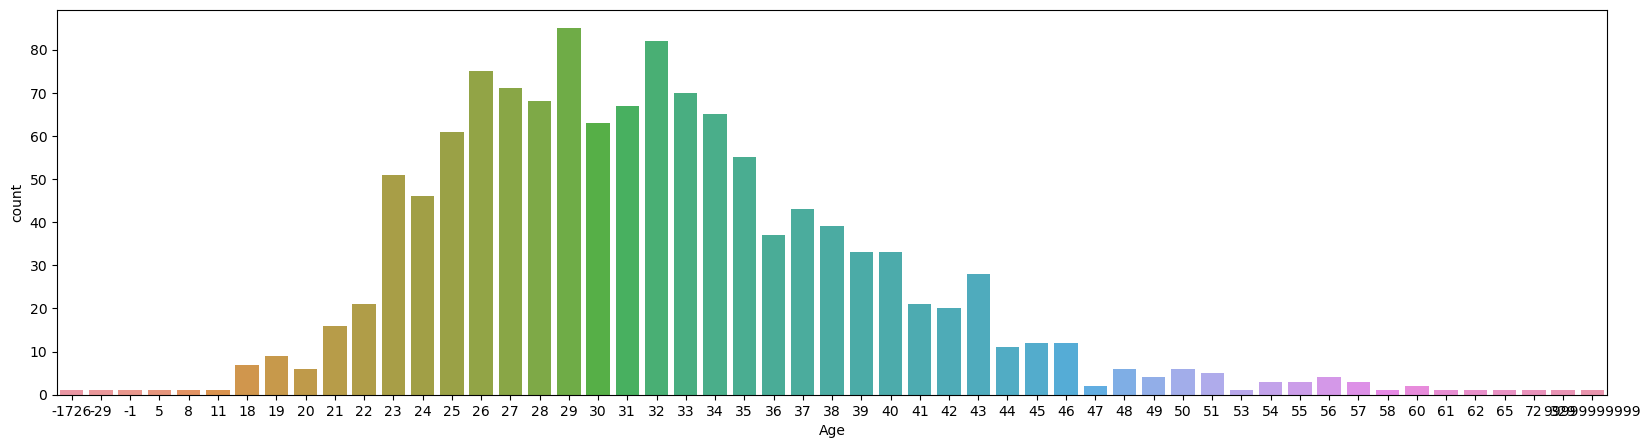

In [23]:
print("The dataset contains different age groups including:")
print(df['Age'].unique())

fig, ax = plt.subplots(figsize = (20, 5))
sns.countplot(x="Age", data=df)

In [24]:
print("The different gender notations used in our dataset are:")
print(df['Gender'].unique())

The different gender notations used in our dataset are:
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


- We can simply see some unreasonable values appear in the **Age** column, such as negative values or values below 14 (unreasonable age for a employee - [LinkForLegalWorkingAge](https://en.wikipedia.org/wiki/Legal_working_age)), or values past 100.
- With **Gender**, we need to clean gender column as it is having too many different categories.

In this stage, I check how many values outsize the range [14,100].

In [25]:
print("The number of ages is less than 14:")
print(df["Age"][df["Age"]<14].count())
print("The number of ages is higher than 100:")
print(df["Age"][df["Age"]>100].count())

The number of ages is less than 14:
6
The number of ages is higher than 100:
2


- The outliers just constitute a very small proportion, so we can savely drop these unreasonable points.

In [26]:
df.drop(df[df["Age"]<14].index, inplace = True)
df.drop(df[df["Age"]>100].index, inplace = True)
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

- Next, grouping **Gender** into three categories: `Female`, `Male` and `Others`.

<AxesSubplot:xlabel='Gender', ylabel='count'>

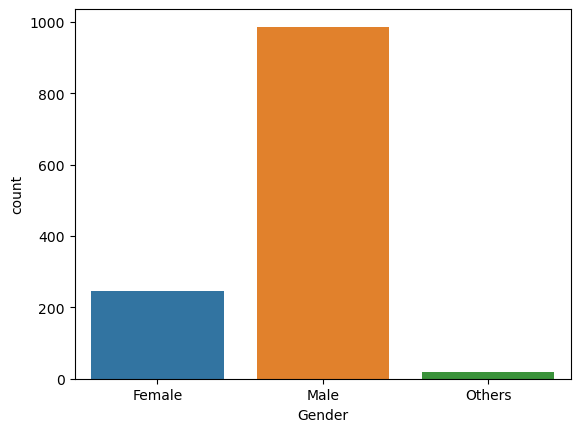

In [27]:
male_group = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile','Cis Male', 
              'Mal', 'Male (CIS)',  'Make', 'Male ', 'Man', 'msle', 
              'Mail', 'cis male', 'Malr', 'Cis Man']
female_group = ['Female', 'Female ','female','Cis Female', 'F', 'Woman', 'f','woman', 
                'Femake', 'cis-female/femme', 'Female (cis)', 'femail']
other_group = ['Trans-female','non-binary', 'Nah', 'Enby', 'fluid', 'Genderqueer', 
               'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'Neuter',
               'queer', 'queer/she/they','Trans woman',
               'Female (trans)','male leaning androgynous', 
               'ostensibly male, unsure what that really means',
               'something kinda male?']
total_words = len(male_group) + len(female_group) + len(other_group)

df["Gender"].replace(male_group,"Male",inplace=True)
df["Gender"].replace(female_group,"Female",inplace=True)
df["Gender"].replace(other_group,"Others",inplace=True)
df["Gender"].value_counts()

sns.countplot(data=df, x='Gender')

- Let's see other columns wih countplot.

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

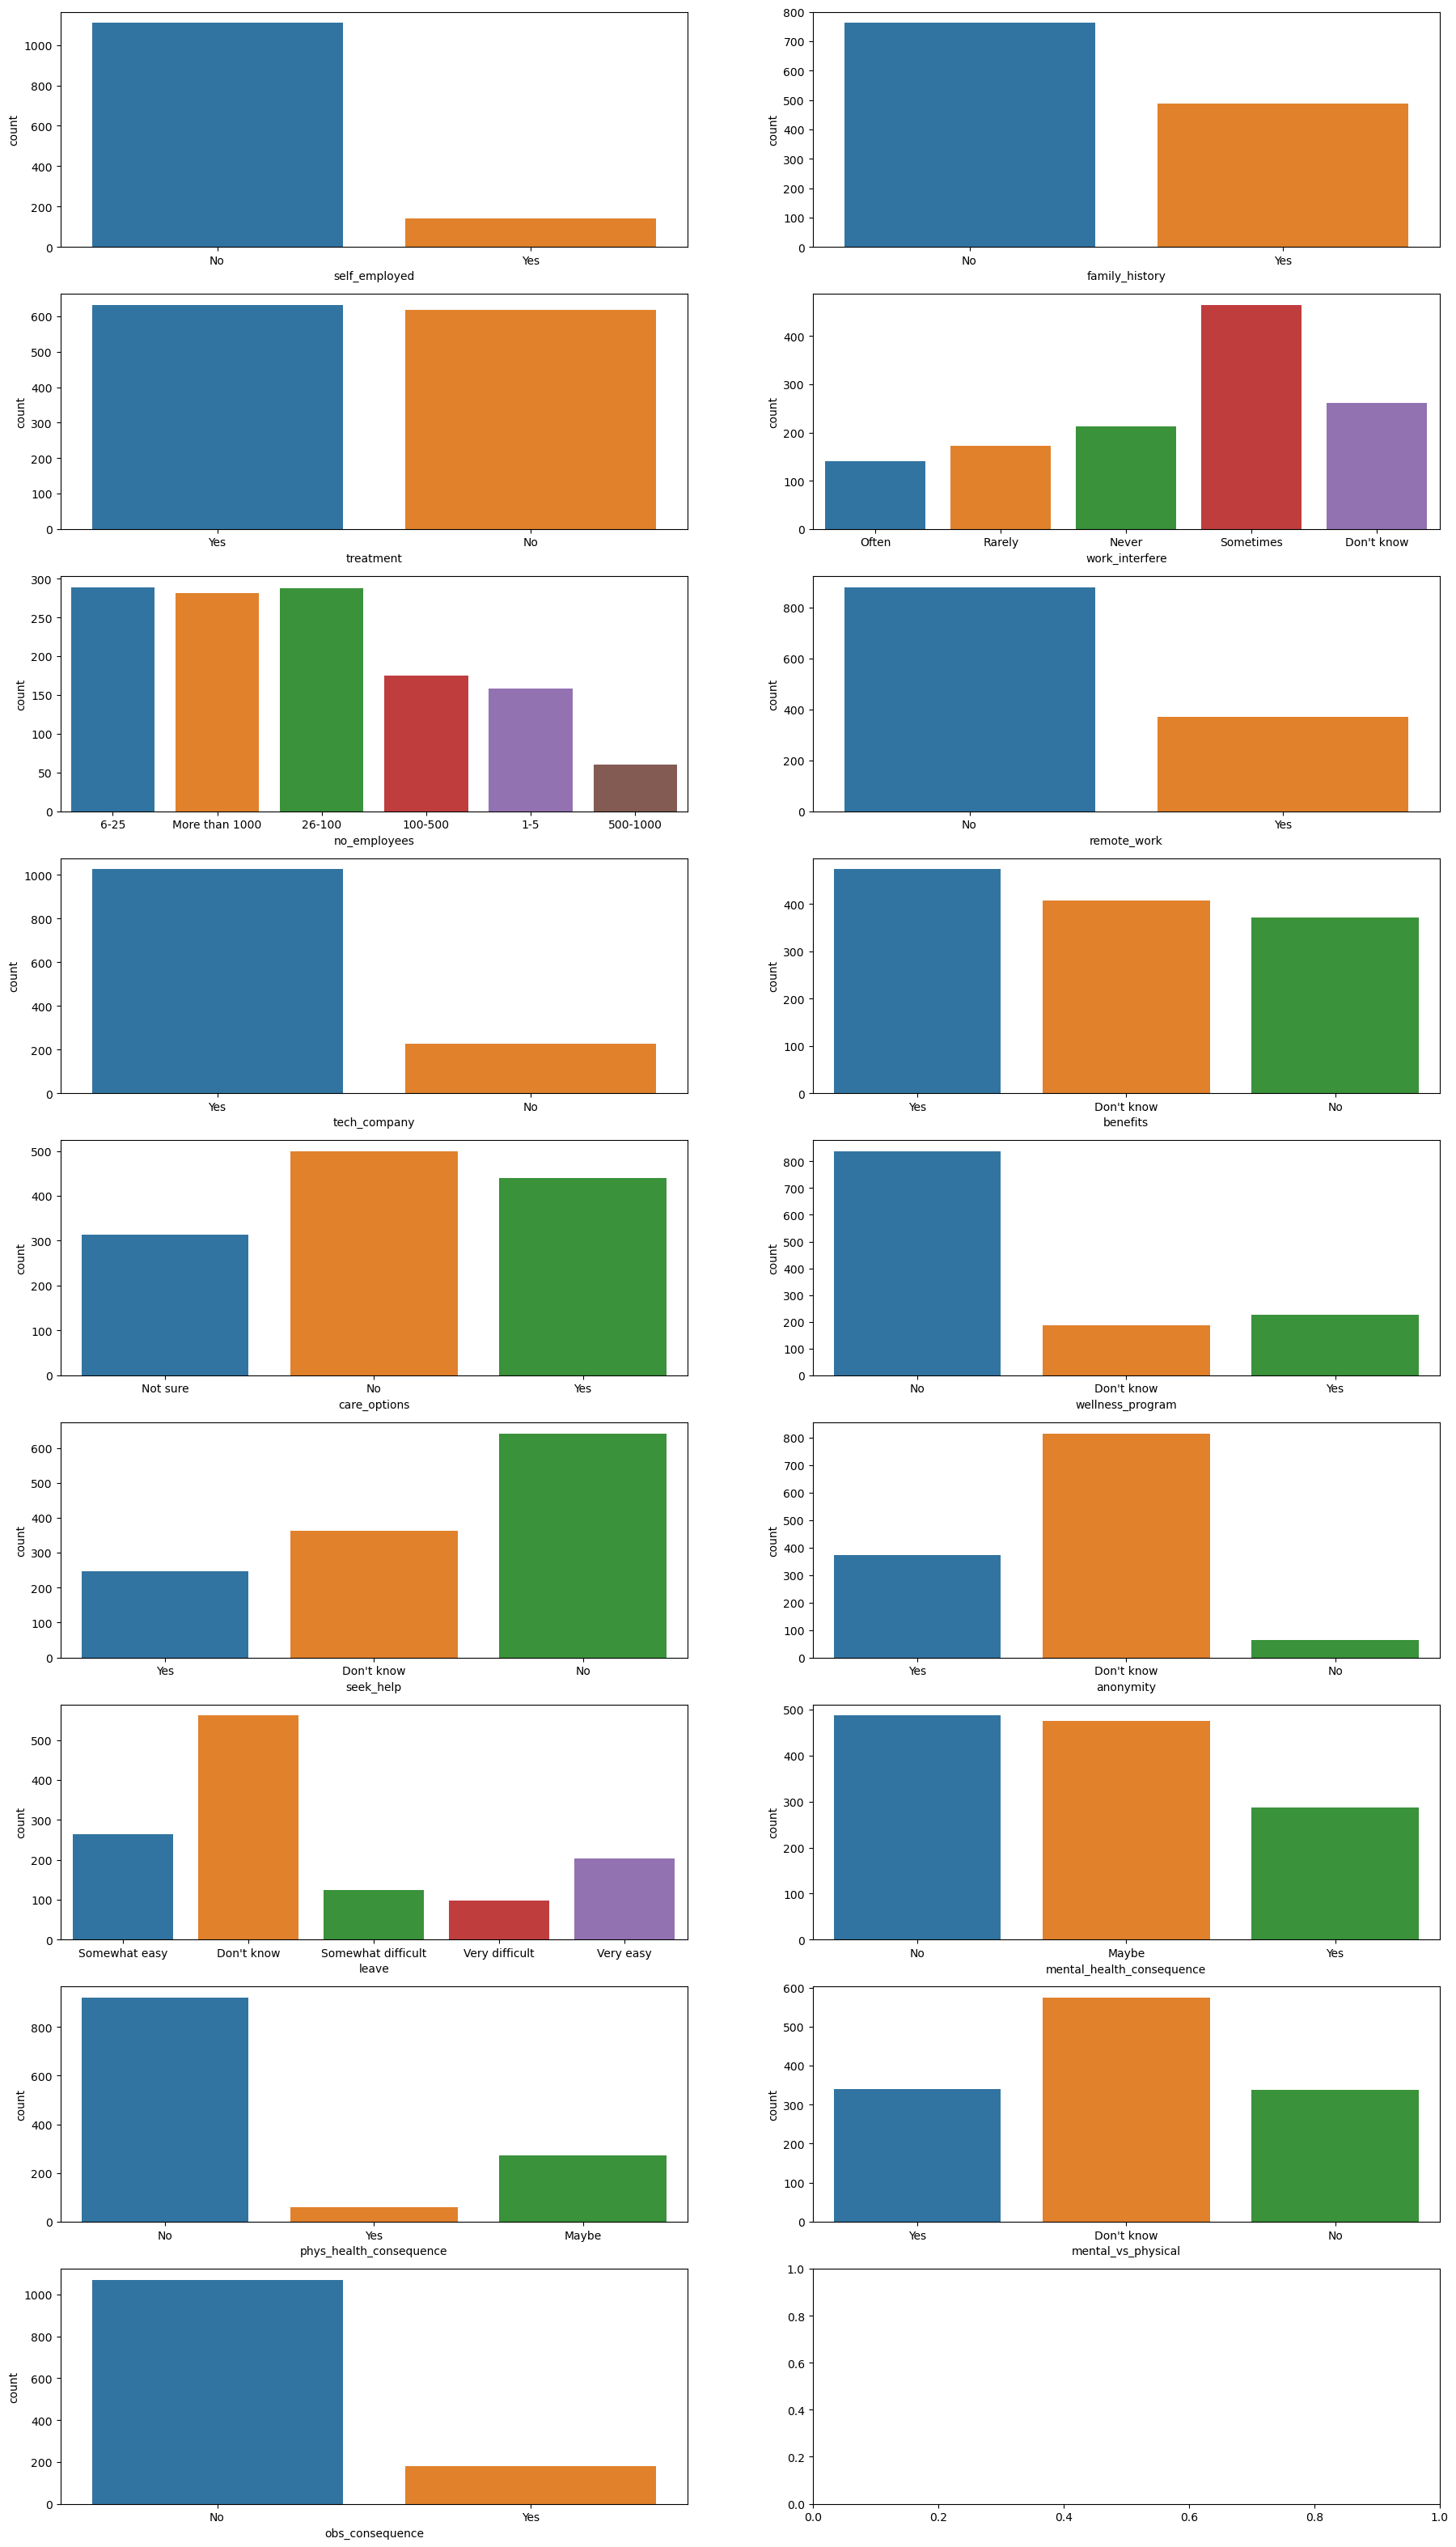

In [28]:
fig, ax = plt.subplots(figsize = (22, 40), ncols=2, nrows=9)
sns.countplot(x="self_employed", data=df, ax=ax[0][0])
sns.countplot(x="family_history", data=df, ax=ax[0][1])
sns.countplot(x="treatment", data=df, ax=ax[1][0])
sns.countplot(x="work_interfere", data=df, ax=ax[1][1])
sns.countplot(x="no_employees", data=df, ax=ax[2][0])
sns.countplot(x="remote_work", data=df, ax=ax[2][1])
sns.countplot(x="tech_company", data=df, ax=ax[3][0])
sns.countplot(x="benefits", data=df, ax=ax[3][1])
sns.countplot(x="care_options", data=df, ax=ax[4][0])
sns.countplot(x="wellness_program", data=df, ax=ax[4][1])
sns.countplot(x="seek_help", data=df, ax=ax[5][0])
sns.countplot(x="anonymity", data=df, ax=ax[5][1])
sns.countplot(x="leave", data=df, ax=ax[6][0])
sns.countplot(x="mental_health_consequence", data=df, ax=ax[6][1])
sns.countplot(x="phys_health_consequence", data=df, ax=ax[7][0])
sns.countplot(x="mental_vs_physical", data=df, ax=ax[7][1])
sns.countplot(x="obs_consequence", data=df, ax=ax[8][0])

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Asking meaningful questions </h1> 

1. How are the work interfere, working style (self-employed, remote work, tech company) and scale of workplace (number of employee) related with the attitude towards treatment?
- Frist, I need to find out **'Have employees sought treatment for their mental health condition?'** and **'Does the employer support mental health?'**
- Then I use some realtionship with treatment to discover the answer.
 - <em>Reason</em>: The workplaces that promote mental health and support people with mental disorders are more likely to  have increased productivity, reduce absenteeism, and benefit from associated economic gains. If employees enjoy good mental health, employees can:
   * Be more productive
   * Take active participation in employee engagement activities and make better relations; both at workplace and personal life.
   * Be more elated and make people around them happy.


2. How does the comfort level of individuals differentiate as regards talking about mental health problems during an interview as contrary to physical health?
 - <em>Reason</em>: This will bring benefits in the future. In this way, the company has more flexibility to structure employees' work to minimize stress and potential problems.
 

3. Do the tech employees mention or discuss about their mental health issues at work?
 - <em>Reason</em>: I want to know that the employees trust their coworkers and supervisors enough to open up about their mental health.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Answering questions </h1> 

## 1. How are the work interfere, working style (self-employed, remote work, tech company) and scale of workplace (number of employee) related with the attitude towards treatment?

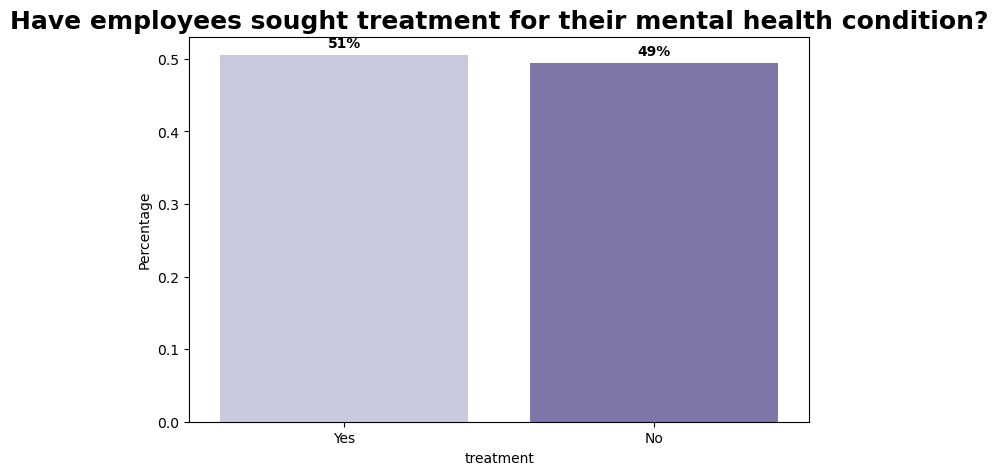

In [29]:
plt.figure(figsize = (8,5))
plt.title('Have employees sought treatment for their mental health condition?', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

- Nearly 50% of people are finding help.This is a very large portion.

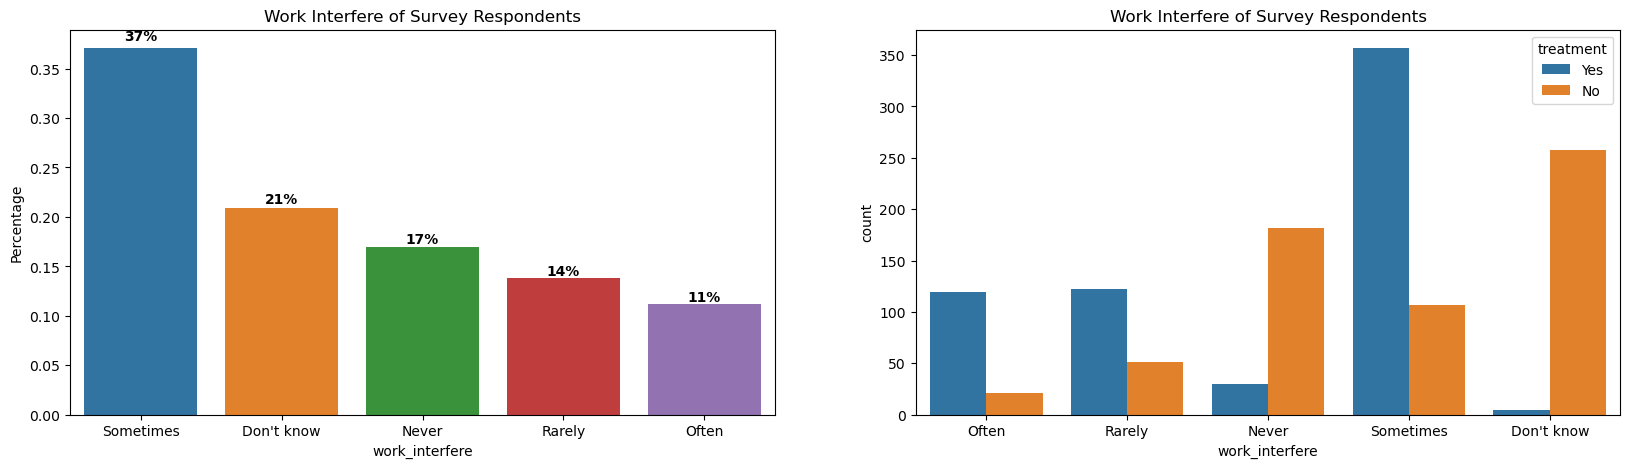

In [30]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('Work Interfere of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'work_interfere', hue = df['treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

Almost the respondents have experienced interference at work with a ratio of sometimes. But what surprised me is `Never` stand in third place.

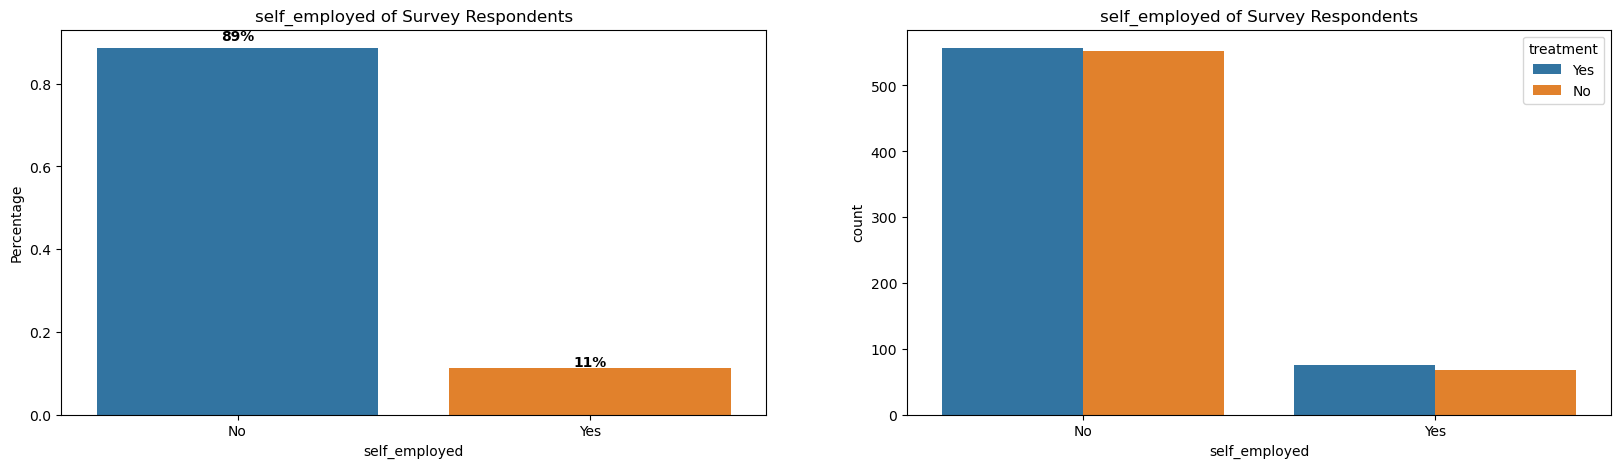

In [31]:

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('self_employed of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'self_employed', hue = df['treatment'])
plt.title('self_employed of Survey Respondents')
plt.show()

- We see that the number of people who are self-employed is around 11%.
- About treatment, there is a similarity in responses NO and YES.

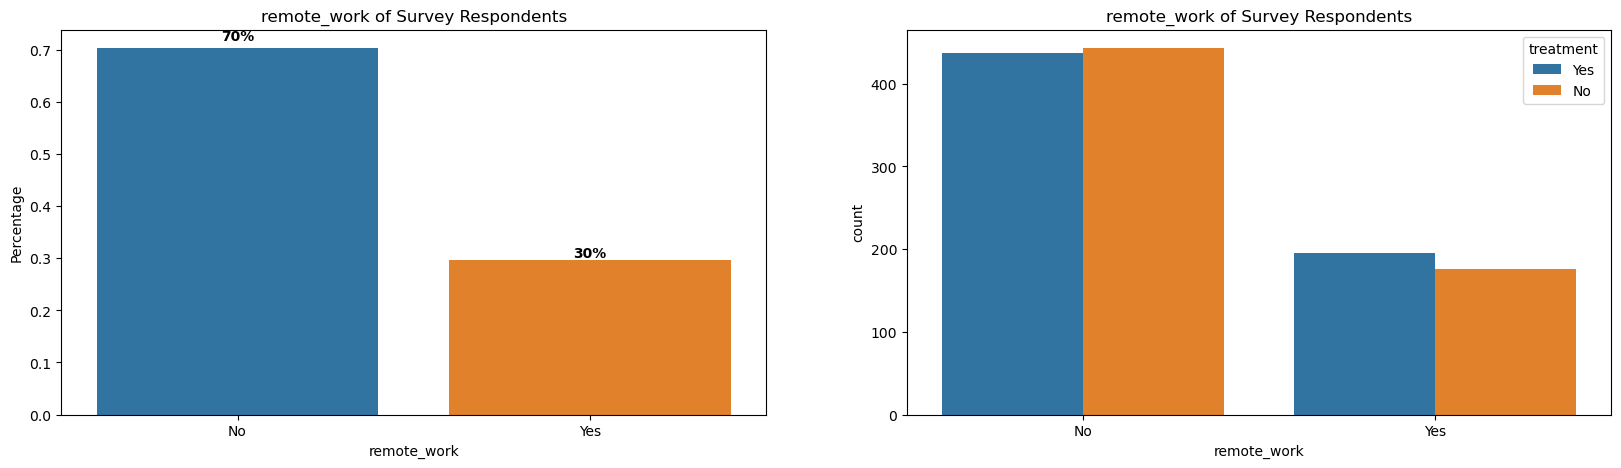

In [32]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('remote_work of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'remote_work', hue = df['treatment'])
plt.title('remote_work of Survey Respondents')
plt.show()

- Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace.

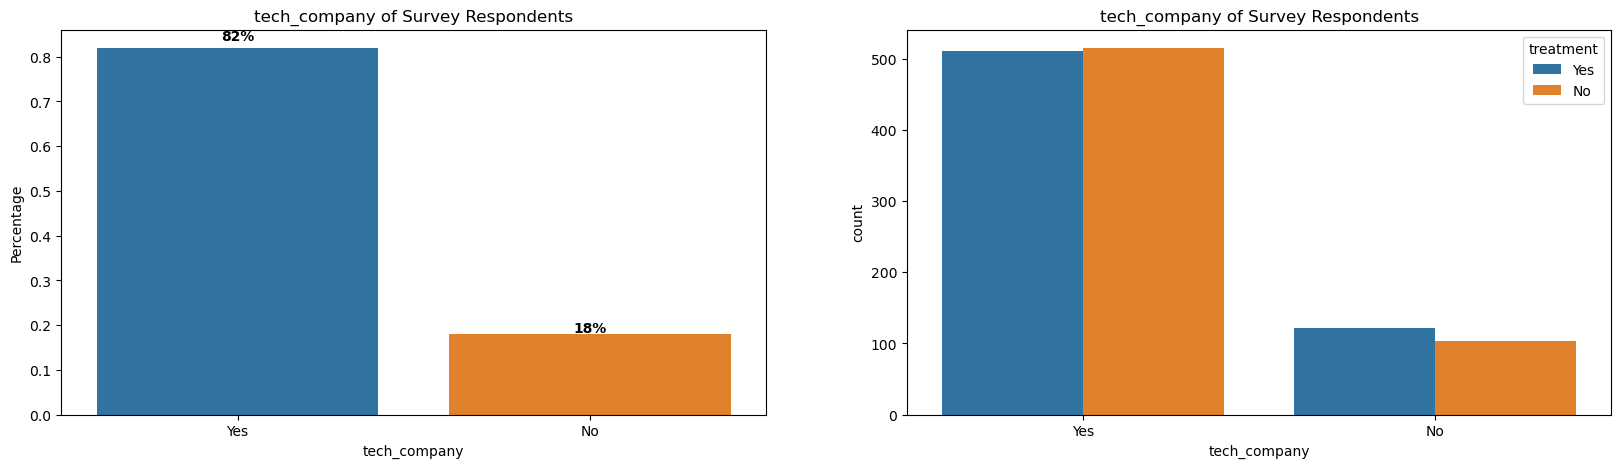

In [33]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('tech_company of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'tech_company', hue = df['treatment'])
plt.title('tech_company of Survey Respondents')
plt.show()

- Although the survey was specifically designed to be conducted in the tech field, there are 18% of companies belong to the non-tech field. However, mental health still becomes a big problem.
- What important is the number of employees in the technology field that want to get treatment is slightly lower than no treatment. In contrast, the non-technical field is the opposite.

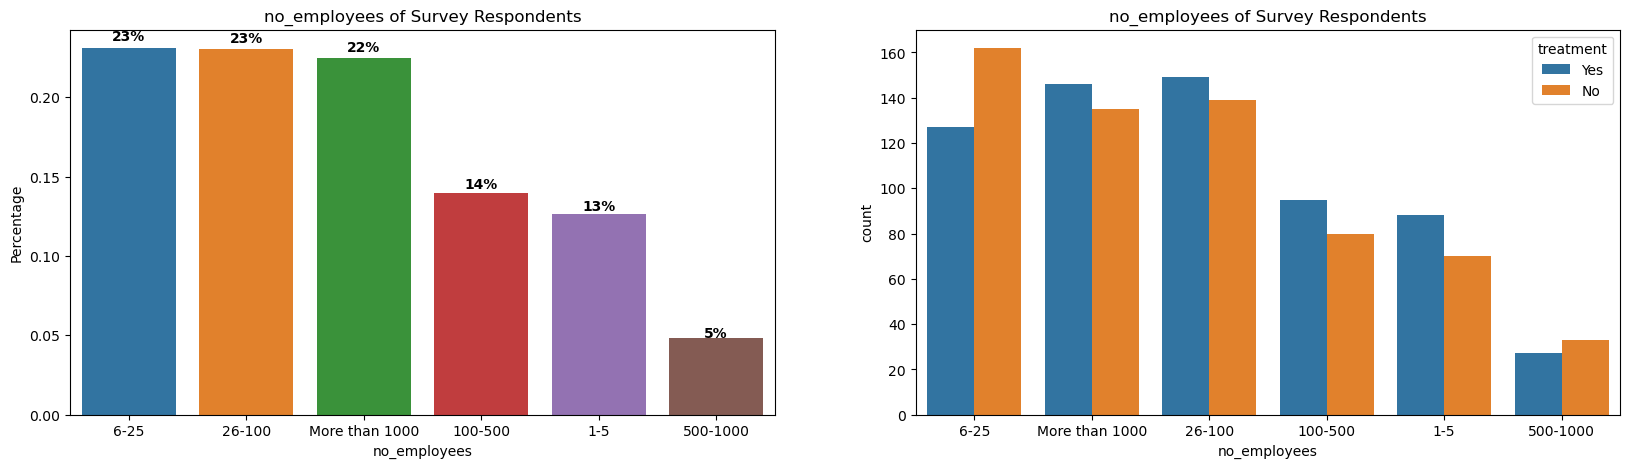

In [34]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['no_employees'].value_counts(normalize = True).rename_axis('no_employees').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'no_employees', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('no_employees of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'no_employees', hue = df['treatment'])
plt.title('no_employees of Survey Respondents')
plt.show()

The **working style (self-employed, remote work, tech company)** and **scale of workplace (number of employee)** do not substantially contribute to the attitude. \
But **how frequently a mental condition inteferes work** is correlated with the attitude. \
Next, I will explore **"Does the employer support mental health?" (benefits, care_options, wellness_program, seek_help, anonymity**  

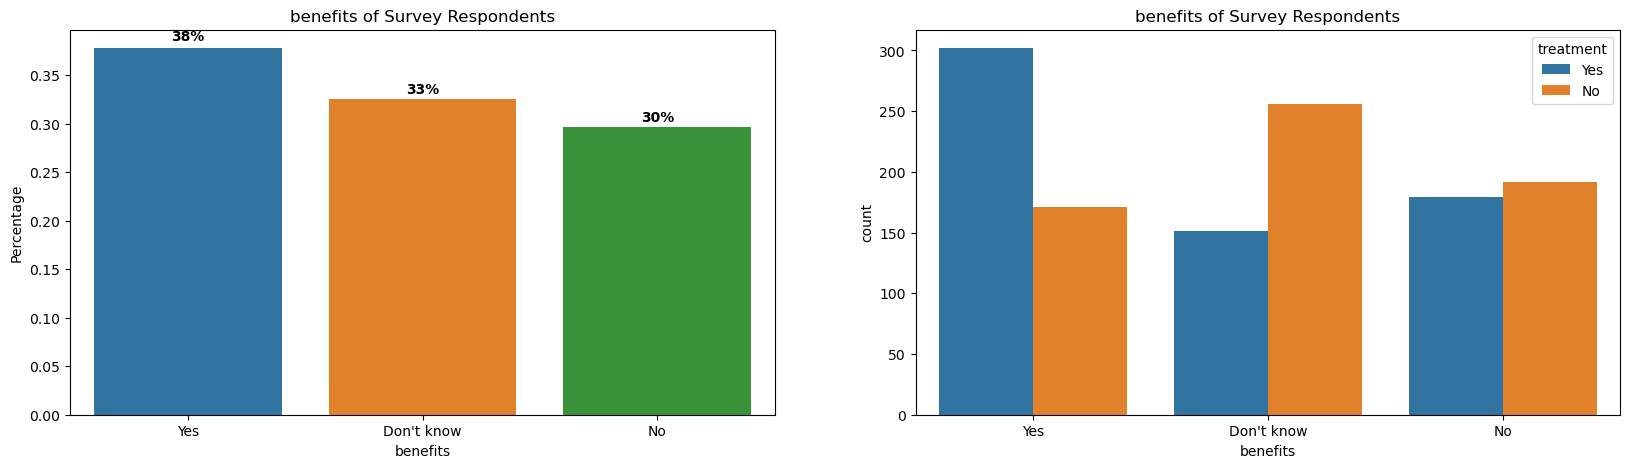

In [35]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'benefits', hue = df['treatment'])
plt.title('benefits of Survey Respondents')
plt.show()

- This was the respondent's answer to the question: `Does your employer provide mental health benefits?`:
  - We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
  - The people who YES said to mental health benefits, around 63% of them said that they were seeking medical help.

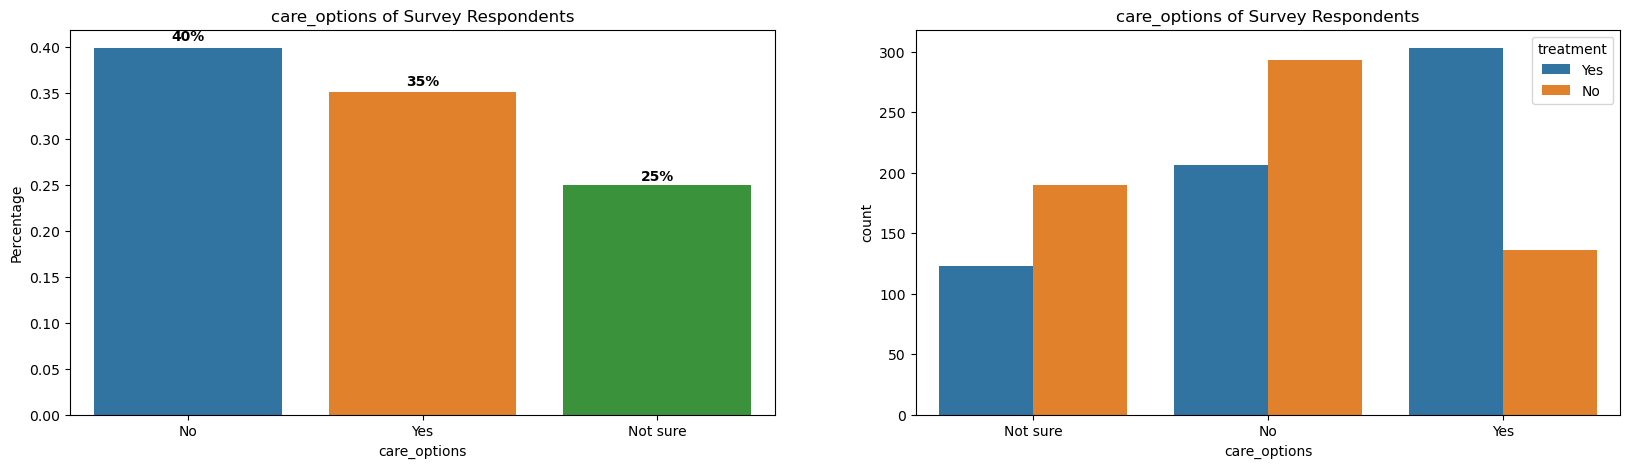

In [36]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('care_options of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'care_options', hue = df['treatment'])
plt.title('care_options of Survey Respondents')
plt.show()

- This was the respondent's answer to the question: `Do you know the options for mental health care your employer provides?`:
  - Contrary to the benefit chart, most people choose NO. 40% of employees are not provided any care options and 25% are not sure whether care options exist in company.

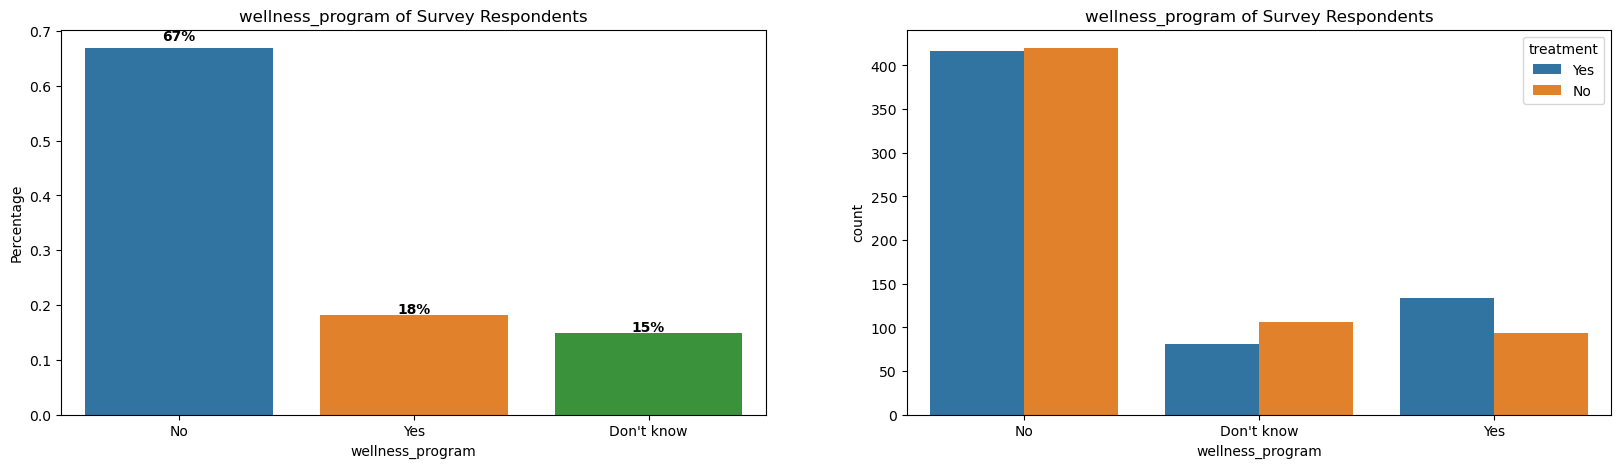

In [37]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('wellness_program of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'wellness_program', hue = df['treatment'])
plt.title('wellness_program of Survey Respondents')
plt.show()

- This was the respondent's answer to the question: `Has your employer ever discussed mental health as part of an employee wellness program?`:
  - One shocking thing is that more than 67% of respondents say that there aren't any programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon. This shouldn't be overlooked

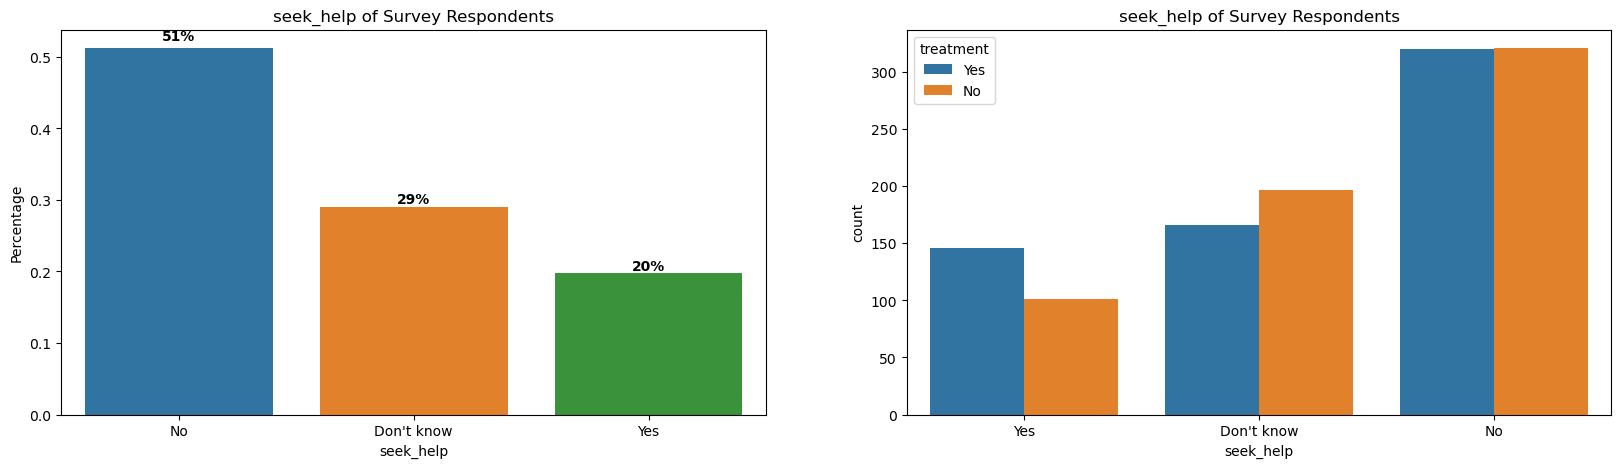

In [38]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['seek_help'].value_counts(normalize = True).rename_axis('seek_help').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'seek_help', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('seek_help of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'seek_help', hue = df['treatment'])
plt.title('seek_help of Survey Respondents')
plt.show()

- This was the respondent's answer to the question: `Does your employer provide resources to learn more about mental health issues and how to seek help?`:
  - It is similar to care_options, benefits and wellness_program. Most of the companies either don't provide any resources or it may be that they dont provide information about the existing resources.

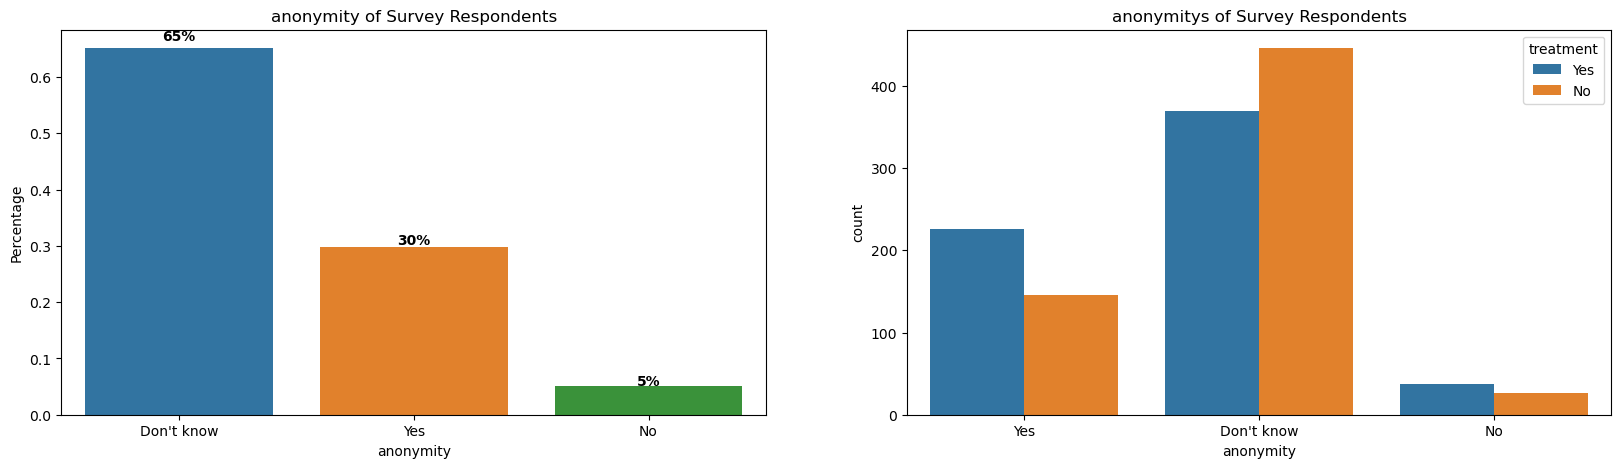

In [39]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('anonymity of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'anonymity', hue = df['treatment'])
plt.title('anonymitys of Survey Respondents')
plt.show()

- This was the respondent's answer to the question: `Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?`:
  - Around 65% of the people were not aware whether anonymity was provided to them and 30% said yes to the provision of anonymity by the company
 - Looking at the right graph, we see that with people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers. In addition, the most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.

## 2. How does the comfort level of individuals differentiate with respect to talking about mental health problems during an interview as opposed to physical health?

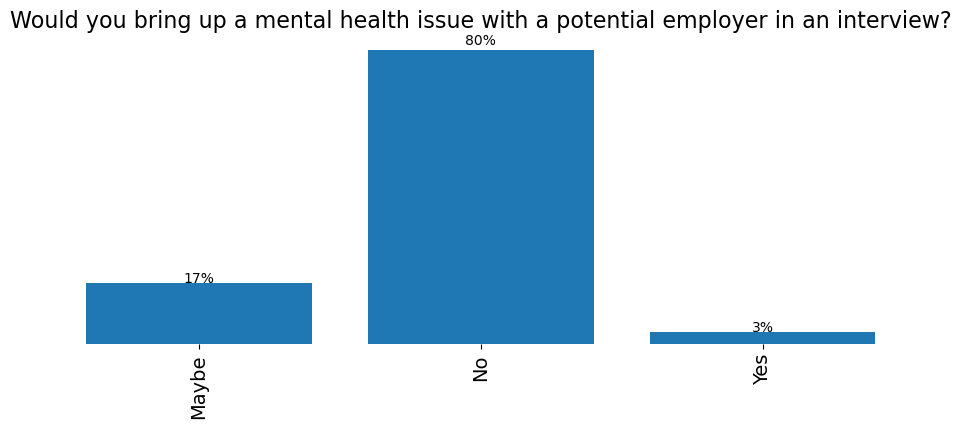

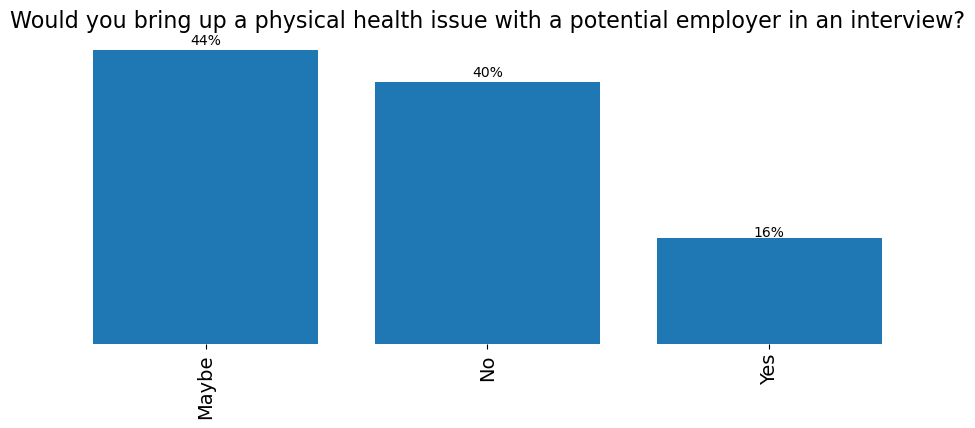

In [40]:
s = df['mental_health_interview'].value_counts(normalize=True).sort_index()
ax = s.plot(kind='bar',figsize=(12,4),width = 0.8)
plt.title("Would you bring up a mental health issue with a potential employer in an interview?",fontsize= 16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
plt.show()
k = df['phys_health_interview'].value_counts(normalize=True).sort_index()
ay = k.plot(kind='bar', figsize=(12,4),width=0.8)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
# Add the annotations
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ay.annotate(f'{height:.0%}', (x + width/2, y +height*1.02), ha='center')
plt.title("Would you bring up a physical health issue with a potential employer in an interview?", fontsize=16)
plt.show()

We can see the similarity in the two graphs. Both of them, employees will be uncomfortable speaking about their mental and physical health. Because they believe that it is a good option to discuss your mental health with the future employer.

## 3. Do the tech employees mention or discuss about their mental health issues at work?

I decide to choose these questions to go deeper and answer this question.
- Do you think that discussing a mental health issue with your employer would have negative consequences?
- Would you be willing to discuss a mental health issue with your coworkers?
- Would you be willing to discuss a mental health issue with your direct supervisor(s)?

Having a look at **mental_health_consequence**, **coworkers** and **supervisor**

In [41]:
df['mental_health_consequence'].value_counts()

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

Text(0.5, 1.0, 'mental_health_consequence of Survey Respondents')

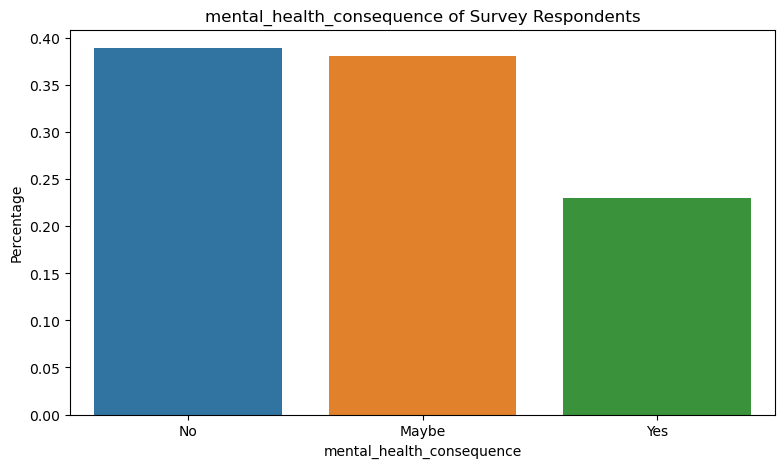

In [42]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage)
plt.title('mental_health_consequence of Survey Respondents')

In [43]:
df['coworkers'].value_counts()

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64

Text(0.5, 1.0, 'coworkers of Survey Respondents')

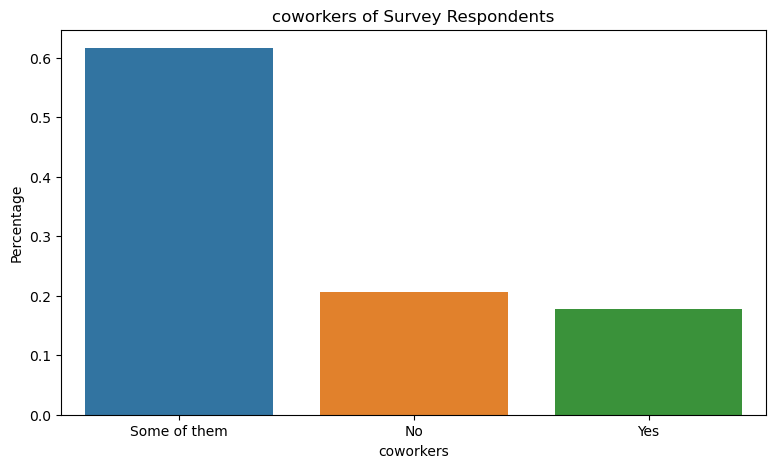

In [44]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage)
plt.title('coworkers of Survey Respondents')

In [45]:
df['supervisor'].value_counts()

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64

Text(0.5, 1.0, 'supervisor of Survey Respondents')

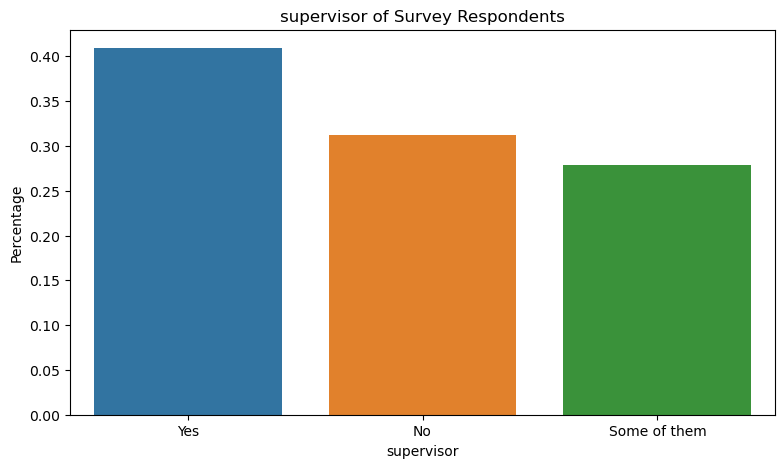

In [46]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
sns.barplot(x = 'supervisor', y = 'Percentage', data = eda_percentage)
plt.title('supervisor of Survey Respondents')

From the three charts, I replace all answers `Some of them` in **supervisor** and **coworkers** to `Maybe` to do the same with `mental_health_consequence`.

In [47]:
df.loc[df["coworkers"] == "Some of them", "coworkers"] = "Maybe"
df.loc[df["supervisor"] == "Some of them", "supervisor"] = "Maybe"

<AxesSubplot:xlabel='supervisor', ylabel='count'>

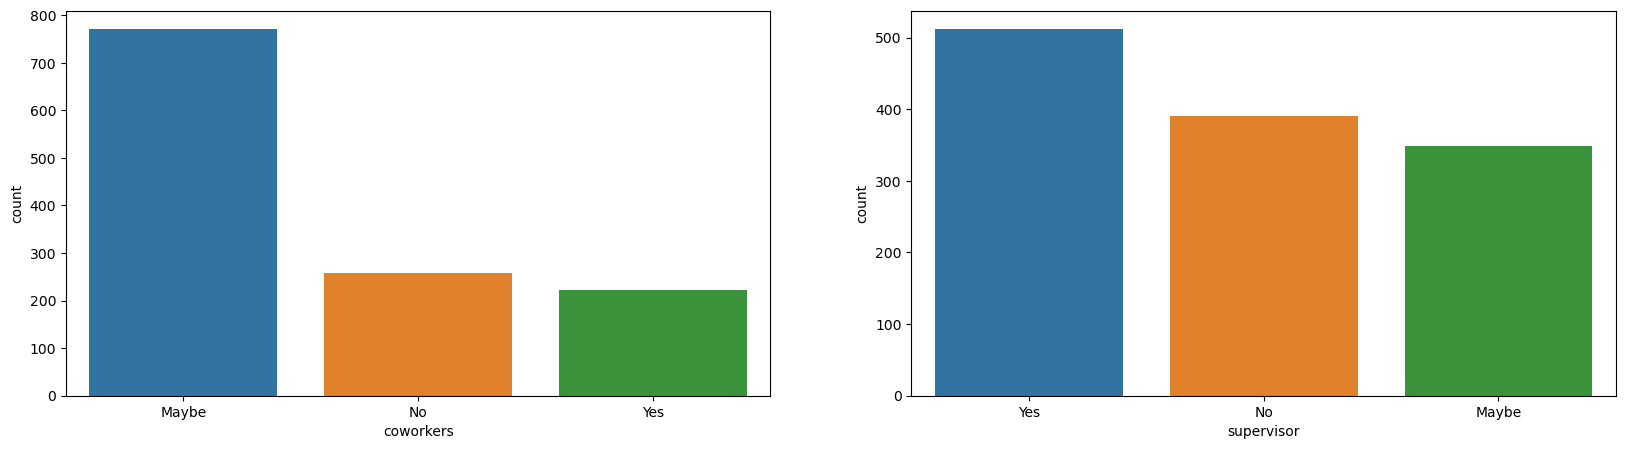

In [48]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x="coworkers", data=df)
    
plt.subplot(1,2,2)
sns.countplot(x="supervisor", data=df)

Next, answer the question

In [49]:
def get_sizes_5(data, col):
    all_ = data[col].count()
    no_ = data[data[col] == 'No'][col].count()
    yes_ = data[data[col] == 'Yes'][col].count()
    maybe_ = data[data[col] == 'Maybe'][col].count()
    return [no_/all_, yes_/all_, maybe_/all_]

In [50]:
labels_3 = 'No', 'Yes', 'Maybe'
mh_discussion_neg_impact_sizes = get_sizes_5(df, 'mental_health_consequence')
mh_discussion_cowork_sizes = get_sizes_5(df, 'coworkers')
mh_discussion_supervis_sizes = get_sizes_5(df, 'supervisor')

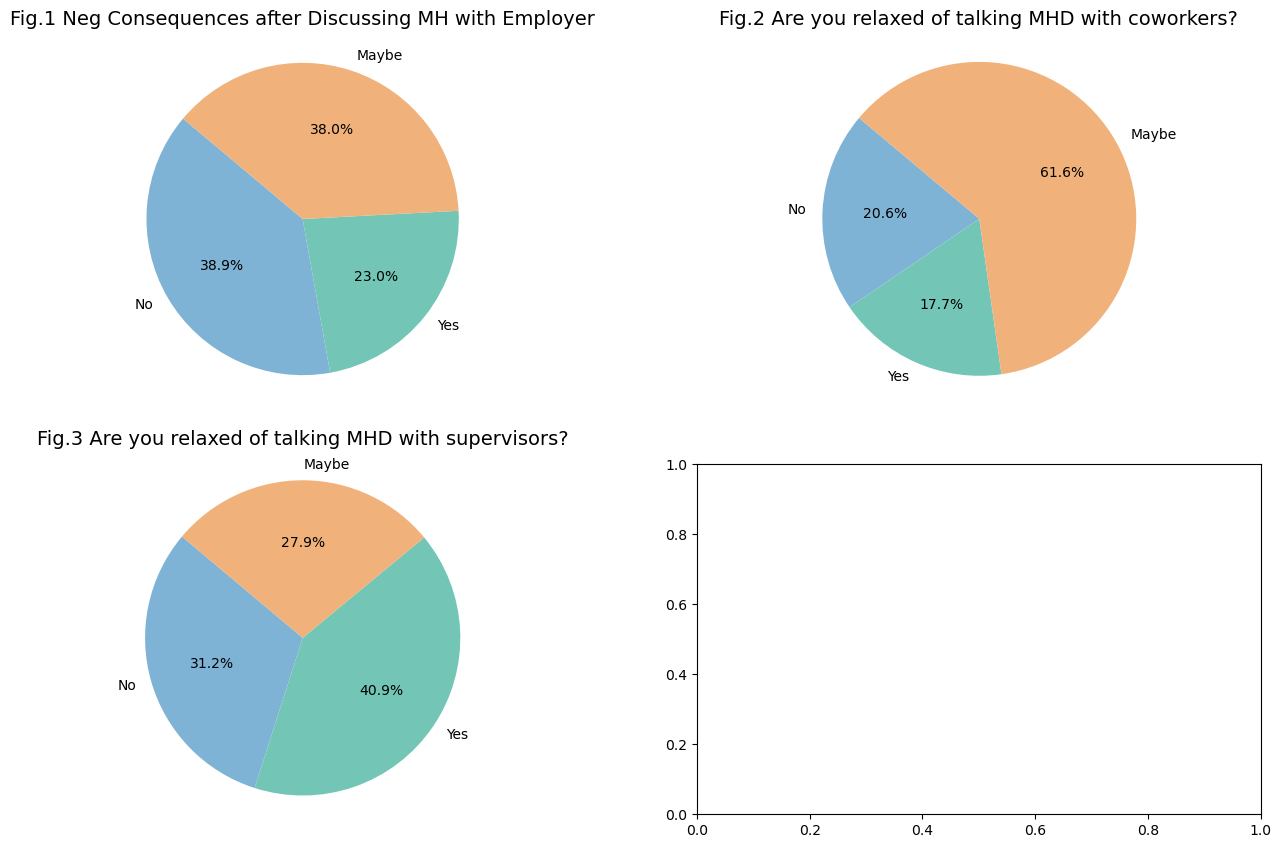

In [51]:
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
fig, ax = plt.subplots(figsize = (16, 10), ncols=2, nrows=2)

ax[0][0].pie(mh_discussion_neg_impact_sizes, labels=labels_3, colors=colors
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('Fig.1 Neg Consequences after Discussing MH with Employer', pad = 14, fontsize = 14)

ax[0][1].pie(mh_discussion_cowork_sizes, labels=labels_3, colors=colors
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('Fig.2 Are you relaxed of talking MHD with coworkers?', pad = 14, fontsize = 14)

ax[1][0].pie(mh_discussion_supervis_sizes, labels=labels_3, colors=colors
             , autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][0].axis('equal')
ax[1][0].set_title('Fig.3 Are you relaxed of talking MHD with supervisors?', pad = 14, fontsize = 14);

- In Fig.1:
  - Around same number of people (around 40% each) answered `Maybe` as well as `No` for the negative impact of discussing mental health consequences with the employer and about 23% said `Yes` to it. This may be because of the stigma, the employees may feel that discussing their mental health might have a negative impact on their employer.
  - Luckily, the working environment is open about discussing any mental health problem without any jugdements. Perspectively, I think that is great to see the companies encourage this sharing and not let those issues effect the working.
- In Fig.2 and Fig.3:
  - We can see that people are open to their coworkers/ supervisors, that is definitely a bright thing nowadays.
  - However, the employees believed that discussing mental health with their coworkers and supervisors wasn't a good option for them, accounting for 20% and 31%, respectively.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Reflection </h1>

1. Difficulties
*What difficulties have you encountered?*
- Confused when there are so many attributes to work on.
- Because this is a fairly large and quite complex data, it is very time-consuming to be able to review and understand all the data.
- While working, I thought of a lot of questions but I don't know if it's a meaningful question.

2. Experiences
*What have you learned?*
- Undetstanding the data science process from finding data to answer the questions and give the meaningful insights.
- Using the github
- Using kaggle
- Using python (numpy, pandas, etc)

3. Expansion
*If you had more time, what would you do?*
- Find and ask more questions. For example, `Compare mental health with physical health in tech?` or `focus on pecific group (tech and non_tech)` to discover.
- Building a ML model to identify `the key features that lead to mental health problems in tech space`.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> References </h1>

- [Machine Learning for Mental Health in Tech Company](https://www.kaggle.com/code/aditiani/machine-learning-for-mental-health-in-tech-company)
- [Mental Health at Workplace](https://www.kaggle.com/code/aditimulye/mental-health-at-workplace)